In [84]:
import numpy as np
import pandas as pd

PARTIAL_PREDICTION_FILE = "partial-predictions/pairwise/predictions.tsv"
partial_predictions = pd.read_csv(PARTIAL_PREDICTION_FILE, sep = '\t')
partial_predictions.head()

,post_id,preds,cord_uid
0,16,"['hg3xpej0', 'jrqlhjsm', 'trrg1mnw', '3qvh482o...",3qvh482o
1,69,"['r58aohnu', 'd06npvro', 'yj3yisum', 'icgsbelo...",r58aohnu
2,73,"['sts48u9i', 'gruir7aw', 'ujq9mxk7', 'hcfoj5l1...",sts48u9i
3,93,"['3sr2exq9', 'sv48gjkk', 'k0f4cwig', 'u43jmpyx...",3sr2exq9
4,96,"['ybwwmyqy', 'ierqfgo5', '3l6ipiwk', 'nlv939ft...",ybwwmyqy


In [85]:
def get_mmr_by_index(row, k=5):
    selected_docs_uids = eval(row["preds"])[:k]
    mmr = 1/([i for i in selected_docs_uids].index(row["cord_uid"]) + 1) if row["cord_uid"] in selected_docs_uids else 0
    return str(mmr)

mmr_data = partial_predictions.apply(get_mmr_by_index, axis=1)
mmr_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1400 entries, 0 to 1399
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
1400 non-null   object
dtypes: object(1)
memory usage: 11.1+ KB


[309  14  26  50  87 914] ['0' '0.2' '0.25' '0.33' '0.5' '1.0']


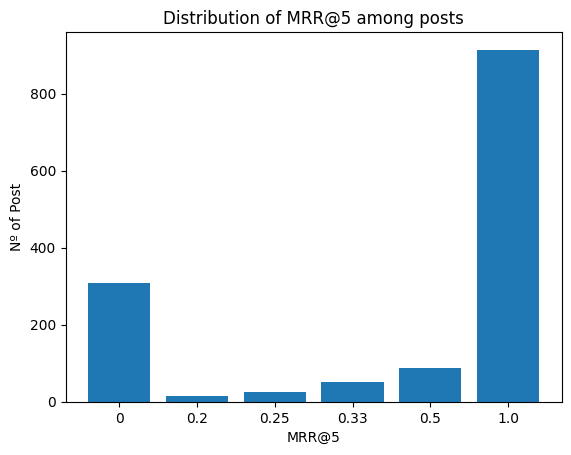

In [86]:
import matplotlib.pyplot as plt

plt.title("Distribution of MRR@5 among posts")
plt.xlabel("MRR@5")
plt.ylabel("Nº of Post")

unique, counts = np.unique(mmr_data, return_counts=True)
unique[3] = '0.33'
print(counts, unique)
plt.bar(unique, counts)
plt.show()


In [87]:
PATH_COLLECTION_DATA = 'data/subtask_4b/subtask4b_collection_data.pkl'
PATH_QUERY_DATA = f'data/subtask_4b/subtask4b_query_tweets_dev.tsv'

df_collection = pd.read_pickle(PATH_COLLECTION_DATA)
df_query = pd.read_csv(PATH_QUERY_DATA, sep = '\t')

first_00_mmr = list(mmr_data).index("0", 200)
first_02_mmr = list(mmr_data).index("0.2")

In [88]:
prediction_00 = partial_predictions.iloc[first_00_mmr]

post_id_00 = prediction_00["post_id"]
gold_ref_00 = prediction_00["cord_uid"]
top_cand_00 = eval(prediction_00["preds"])[0]


tweet_00 = df_query[df_query["post_id"] == post_id_00]["tweet_text"].values[0]
gold_abs_00 = df_collection[df_collection["cord_uid"] == gold_ref_00]["abstract"].values[0]
cand_abs_00 = df_collection[df_collection["cord_uid"] == top_cand_00]["abstract"].values[0]

print(tweet_00)
print(gold_ref_00)
print(gold_abs_00)
print(top_cand_00)
print(cand_abs_00)

ah good point on uk using asians. but the best cdc study found 81% protection against omicron for 2 doses mrna &lt;180d, 57% 2 doses &gt;180d, 90% for 3 doses. but would you expect any other v platforms to protect against a far different variant than the vaccine?
yb9uyov3
Estimates of COVID-19 mRNA vaccine effectiveness (VE) have declined in recent months (1,2) because of waning vaccine induced immunity over time,* possible increased immune evasion by SARS-CoV-2 variants (3), or a combination of these and other factors. CDC recommends that all persons aged ≥12 years receive a third dose (booster) of an mRNA vaccine ≥5 months after receipt of the second mRNA vaccine dose and that immunocompromised individuals receive a third primary dose.† A third dose of BNT162b2 (Pfizer-BioNTech) COVID-19 vaccine increases neutralizing antibody levels (4), and three recent studies from Israel have shown improved effectiveness of a third dose in preventing COVID-19 associated with infections with the S

In [89]:
prediction_02 = partial_predictions.iloc[first_02_mmr]

post_id_02 = prediction_02["post_id"]
gold_ref_02 = prediction_02["cord_uid"]
top_cand_02 = eval(prediction_02["preds"])[0]


tweet_02 = df_query[df_query["post_id"] == post_id_02]["tweet_text"].values[0]
gold_abs_02 = df_collection[df_collection["cord_uid"] == gold_ref_02]["abstract"].values[0]
cand_abs_02 = df_collection[df_collection["cord_uid"] == top_cand_02]["abstract"].values[0]

print(tweet_02)
print(gold_ref_02)
print(gold_abs_02)
print(top_cand_02)
print(cand_abs_02)

Antibody dependent enhancement/pathogenic priming led to all previous coronavirus spike protein vaccines failing safety testing and FDA approval. It's utterly misleading that everyone is being told these shots are safe when that is absolutely not true.
rb20ge7e
Antibody-based drugs and vaccines against severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) are being expedited through preclinical and clinical development. Data from the study of SARS-CoV and other respiratory viruses suggest that anti-SARS-CoV-2 antibodies could exacerbate COVID-19 through antibody-dependent enhancement (ADE). Previous respiratory syncytial virus and dengue virus vaccine studies revealed human clinical safety risks related to ADE, resulting in failed vaccine trials. Here, we describe key ADE mechanisms and discuss mitigation strategies for SARS-CoV-2 vaccines and therapies in development. We also outline recently published data to evaluate the risks and opportunities for antibody-based protection a